# Problem Set 3, due Wednesday, May 3rd, 5:30pm.

## Introduction to the assignment

For this assignment, you will be using data from the [Progresa
program](http://en.wikipedia.org/wiki/Oportunidades), a government
social assistance program in Mexico. This program, as well as the
details of its impact, are described in the paper "[School subsidies
for the poor: evaluating the Mexican Progresa poverty
program](http://www.sciencedirect.com/science/article/pii/S0304387803001858)",
by Paul Shultz (available on Canvas).  The data
(progresa_sample.csv.gz) is available on canvas
in files/data.

Please read the paper to familiarize yourself with
the PROGRESA program before beginning this problem set, so you have a
rough sense of where the data come from and how they were
generated. If you just proceed into the problem set without
understanding Progresa or the data, it will be very difficult!

The goal of this problem set is to implement some of the basic
econometric techniques that you are learning in class to measure the
impact of Progresa on secondary school enrollment rates, in particular
differences-in-differences.  Your task is to **estimate the impact of
_progresa_ subsidies on the school attendance**.  Note: this asks to
estimate a causal effect.

The timeline of the program was:

 * Baseline survey conducted in 1997
 * Intervention begins in 1998, "Wave 1" of data collected in 1998
 * "Wave 2 of data" collected in 1999
 * Evaluation ends in 2000, at which point the control villages were treated. 
 
When you are ready, download the progresa_sample.csv data from
Canvas. The data are actual data collected to evaluate the impact of
the Progresa program.  In this file, each row corresponds to an
observation taken for a given child for a given year. There are two
years of data (1997 and 1998), and just under 40,000 children who are
surveyed in both years.  For each child-year observation, the
following variables are collected:

| Variable name | Description|
|------|------|
|year	  |year in which data is collected
|sex	  |male = 1|
|indig	  |indigenous = 1|
|dist_sec |nearest distance to a secondary school|
|sc	      |enrolled in school in year of survey (=1)|
|grc      |grade enrolled|
|fam_n    |family size|
|min_dist |	min distance to an urban center|
|dist_cap |	min distance to the capital|
|poor     |	poor = "pobre", not poor = "no pobre"|
|progresa |treatment = "basal", control = "0"|
|hohedu	  |years of schooling of head of household|
|hohwag	  |monthly wages of head of household|
|welfare_index|	welfare index used to classify poor|
|hohsex	|gender of head of household (male=1)|
|hohage	|age of head of household|
|age	|years old|
|folnum	|individual id|
|village|	village id|
|sc97	|enrolled in school in 1997 (=1) |

## Part 1: Descriptive analysis

### 1.1	Summary Statistics

Report summary statistics (mean, standard deviation, and number of missings) for all of
the demographic variables in the dataset (i.e., everything except
year, folnum, village).  Present the actual levels for 'progresa' and
'poor'.  Do these fit with the documentation above?

Present these in a single table alphabetized
by variable name. Do NOT simply expect the grader to scroll through
your output!

In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
dat = pd.read_csv('C:/Users/Manisha/Desktop/UW/MSIM 2017 - 2019/03. Spring Quarter 2017/INFX 574/Problem Sets/PS 3/progresa_sample.csv')

det = pd.DataFrame(data=dat, columns=('sex','indig','dist_sec','sc','grc','fam_n','min_dist','dist_cap','hohedu','hohwag','welfare_index','hohsex','hohage','age','grc97','sc97'))
det.head()
missing = det.isnull().sum()

det = det.describe()
det = pd.DataFrame({'Mean':det.loc['mean'],'Standard Deviation':det.loc['std'],'Missing Values':missing})
det.reset_index(level=0,inplace=True)
det.sort_values('index')

fdet = det.rename(columns={"index":"Variables"}).sort_values('Variables').reset_index(level=0,inplace=False)
fdet = pd.DataFrame(data=fdet,columns=('Variables','Mean','Standard Deviation','Missing Values'))

fdet

,Variables,Mean,Standard Deviation,Missing Values
0,age,11.366460,3.167744,0
1,dist_cap,147.674452,76.063134,0
2,dist_sec,2.418910,2.234109,0
3,fam_n,7.215715,2.352900,0
4,grc,3.963537,2.499063,6549
5,grc97,3.705372,2.572387,0
6,hohage,44.436717,11.620372,10
7,hohedu,2.768104,2.656106,0
8,hohsex,0.925185,0.263095,20
9,hohwag,586.985312,788.133664,0


In [3]:
# Levels in Pregresa and Poor
print("Levels in progresa column:",dat.progresa.unique())
print("Missing values in progresa column:",dat.progresa.isnull().sum())
print("\nLevels in poor column:",dat.poor.unique())
print("Missing values in poor column:",dat.poor.isnull().sum())

Levels in progresa column: ['0' 'basal']
Missing values in progresa column: 0

Levels in poor column: ['pobre' 'no pobre']
Missing values in poor column: 0


Yes, 'progresa' and 'poor' levels coded in the dataset match with the information documented above. Progresa variable has levels: 0 and basal, with no missing values. Poor variable has levels: no pobre and pobre, with no missing values.

### 1.2 Differences at baseline?
Now let's investigate the differences in baseline.  Are the baseline (1997) demographic characteristics **for the poor**
different in treatment and control villages?

I suggest you to use a T-Test to
determine whether there is a statistically significant difference in
the average values of each of the variables in the dataset. Focus only
on the data from 1997 for poor.

Present your results in a single table with the following columns and 14 (or so) rows:

| Variable name | Average value (Treatment villages) | Average value (Control villages) | Difference (Treat - Control) | p-value |
|------|------|------|------|------|
|Male|?|?|?|?|


In [4]:
ntdat = dat.loc[(dat['year']==97) & (dat['poor']=='pobre') & (dat['progresa']=='0')]
tdat = dat.loc[(dat['year']==97) & (dat['poor']=='pobre') & (dat['progresa']=='basal')]
ntdat = pd.DataFrame(data=ntdat, columns=('sex','indig','dist_sec','sc','grc','fam_n','min_dist','dist_cap','hohedu','hohwag','welfare_index','hohsex','hohage','age','grc97','sc97'))
tdat = pd.DataFrame(data=tdat, columns=('sex','indig','dist_sec','sc','grc','fam_n','min_dist','dist_cap','hohedu','hohwag','welfare_index','hohsex','hohage','age','grc97','sc97'))
tdat = tdat.T
ntdat = ntdat.T

tdat.mean(axis=1)
ntdat.mean(axis=1)

diff = []
p = []
d = pd.DataFrame({'Variable name':tdat.mean(axis=1).index,'Average value (Treatment villages)':tdat.mean(axis=1).values,'Average value (Control villages)':ntdat.mean(axis=1).values})

for i in range(16):
    diff.append(d.iloc[i,1] - d.iloc[i,0])
    p.append(scipy.stats.ttest_ind(tdat.iloc[i].dropna().values,ntdat.iloc[i].dropna().values).pvalue)
    
d = pd.DataFrame({'Variable name':tdat.mean(axis=1).index,'Average value (Treatment villages)':tdat.mean(axis=1).values,'Average value (Control villages)':ntdat.mean(axis=1).values,'Difference (Treat - Control)':diff,'p-value':p})
d = pd.DataFrame(data=d, columns=('Variable name','Average value (Treatment villages)','Average value (Control villages)','Difference (Treat - Control)','p-value'))

d

,Variable name,Average value (Treatment villages),Average value (Control villages),Difference (Treat - Control),p-value
0,sex,0.519317,0.505052,0.014265,1.219172e-02
1,indig,0.325986,0.332207,-0.006222,2.453603e-01
2,dist_sec,2.453122,2.507662,-0.054540,3.569843e-02
3,sc,0.822697,0.815186,0.007511,9.517806e-02
4,grc,3.531599,3.543050,-0.011450,6.890151e-01
5,fam_n,7.281327,7.302469,-0.021142,4.271039e-01
6,min_dist,107.152915,103.237854,3.915060,2.358312e-16
7,dist_cap,150.829074,153.769730,-2.940656,8.415005e-04
8,hohedu,2.663139,2.590348,0.072791,1.105093e-02
9,hohwag,544.339544,573.163558,-28.824015,3.253835e-04


### 1.3 Interpretation

* A: Are there statistically significant differences between treatment and control villages as baseline? 
* B: Why does it matter if there are differences at baseline?
* C: What does this imply about how to measure the impact of the treatment?

-A. Yes, there are variables for which we obtain statitically significant differences (min_dist, hohedu,hohwage etc.). For other variables (indig,grc,fam_n etc.), we do not see statitically significant differences as p values are comparable to 0.05.

-B. Baseline considered here is treatment and control villages. With statistically signifiacnt differences, it refrain us from establishing a causal relationship between effect of treatment and enrollment as the counterfactual is difficult to assume with differences at the baseline.

-C. It helps us identify the demographic parameters in which the treatment and control populations are similar and can be leveraged for establishing causal relationship. For instance, if we take the example of head of household education, we see that the average value for treatment villages is higher than the control villages in 1997 and this difference is statistically insignificant which implies that we can make the counterfactual assumption that the average change in the control group represents the counterfactual change in the treatment group if there were no treatment.

### 1.4 Graphical exploration, part 1

For each level of household head education, compute the average
enrollment rate in 1997. Create a scatterplot that shows this
relationship. What do you notice?

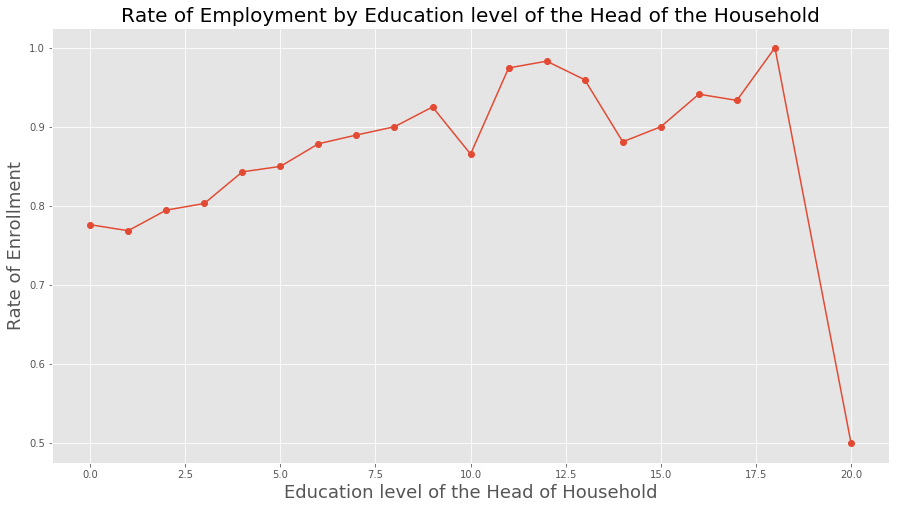

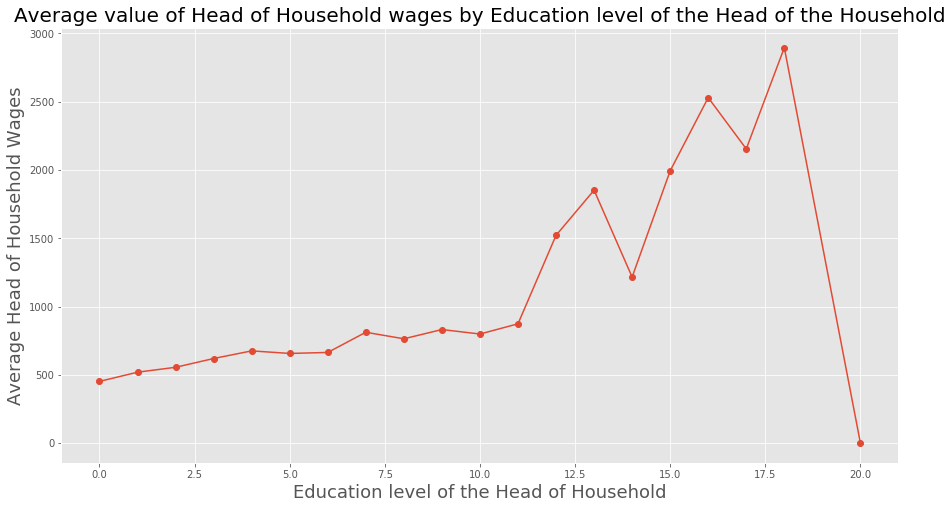

In [5]:
bdat = dat[dat['year']==97]
g = bdat.groupby('hohedu').sc97.mean()

plt.style.use('ggplot')
plt.figure(figsize=(15,8))

plt.plot(g.index,g.values, '-o')
plt.xlabel('Education level of the Head of Household',fontsize=18)
plt.ylabel('Rate of Enrollment',fontsize=18)
plt.title('Rate of Employment by Education level of the Head of the Household',fontsize=20)
plt.show()

bdat = dat[dat['year']==97]
g = bdat.groupby('hohedu').hohwag.mean()

plt.figure(figsize=(15,8))
plt.plot(g.index,g.values,'-o')
plt.xlabel('Education level of the Head of Household',fontsize=18)
plt.ylabel('Average Head of Household Wages',fontsize=18)
plt.title('Average value of Head of Household wages by Education level of the Head of the Household',fontsize=20)
plt.show()

Based on the above, we notice that with increase education level of the head of the household, there is an increase in the enrollment rate. However, at higher years of education for head od household(>18), there is a sudden decrease in the rate of enrollment. Though, it is contradictory to the inituition that more educated the elders in the family leads to better support of child education in the household however, financial aspect could be the reason for most of these cases which is evident in the second plot where we see dip in the average head of household wages drop at th higher level of education(>18).

### 1.5 Graphical exploration, part 2

Create a histogram of village enrollment rates **among poor households
in treated villages**, before and after treatment.  Specifically, for
each village, calculate the average rate of enrollment of poor
households in treated villages in 1997, then compute the average rate
of enrollment of poor households in treated villages in 1998. Create
two separate histograms showing the distribution of these average
enrollments rates, one histogram for 1997 and one histogram for
1998. On each histogram, draw a vertical line that intersects the
x-axis at the average value (across all households). Does there appear
to be a difference? Is this difference statistically significant?

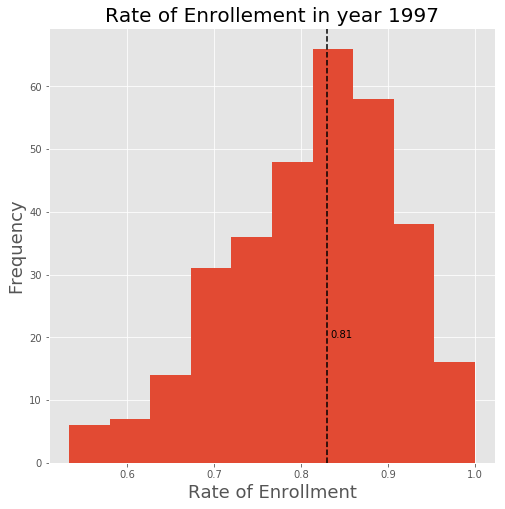

In [14]:
bdat = dat[(dat['year']==97) & (dat['poor']=='pobre') & (dat['progresa']=='basal')]
g1 = bdat.groupby('village').sc97.mean()

plt.figure(figsize=(8,8))
plt.hist(g1.values)
plt.ylabel('Frequency',fontsize=18)
plt.xlabel('Rate of Enrollment',fontsize=18)
plt.title('Rate of Enrollement in year 1997', fontsize=20)
plt.axvline(x=g.values.mean(), color='k', linestyle='--')
plt.text(x=g1.values.mean()+0.020,y=20,s=round(g1.values.mean(),2))
plt.show()

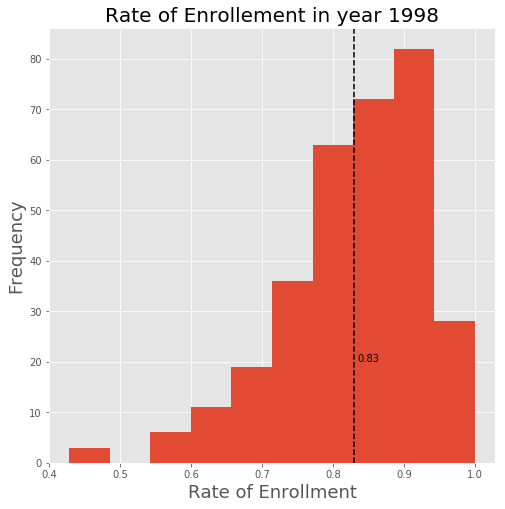

P-value for treatment villages(before and after 1998): 0.0442487003657


In [15]:
bdat1 = dat[(dat['year']==98) & (dat['poor']=='pobre') & (dat['progresa']=='basal')]
g = bdat1.groupby('village').sc.mean()
plt.figure(figsize=(8,8))
plt.hist(g.values)
plt.ylabel('Frequency',fontsize=18)
plt.xlabel('Rate of Enrollment',fontsize=18)
plt.title('Rate of Enrollement in year 1998',fontsize=20)
plt.axvline(x=g.values.mean(), color='k', linestyle='--')
plt.text(x=g.values.mean()+0.005,y=20,s=round(g.values.mean(),2))
plt.show()

print("P-value for treatment villages(before and after 1998):",scipy.stats.ttest_ind(g1,g).pvalue)

* There is a small difference between average rate of enrollement before and after 1998. It comes out to be around 0.02 approx. 
* Yes, this difference is statistically significant as the p-value(0.044 approx) is less than the signigifcant critical value (0.05) which means we can reject the null hypothesis that the means/averages are equal.

## Part 2: Measuring Impact

Our goal is to estimate the causal impact of the PROGRESA program on
the social and economic outcomes of individuals in Mexico. We will
focus on the impact of the program on the poor (those with
poor=='pobre'), since only the poor were eligible to receive the
PROGRESA assistance.

### 2.1 Cross-Sectional Estimator: T-test

Begin by estimating the impact of Progresa using "simple differences."
Restricting yourself to data from 1998 (after treatment), calculate
the average enrollment rate among **poor** households in the Treatment
villages and the average enrollment rate among **poor** households in
the control villages. Use a t-test to determine if this difference is
statistically significant. What do you conclude?

In [7]:
dat1 = dat[(dat['poor']=='pobre') & (dat['year']==98)]
dat1.groupby('progresa').sc.mean()

print(dat1.groupby('progresa').sc.mean())

tdat1 = dat1[dat1['progresa']=='basal']
ntdat1 = dat1[dat1['progresa']=='0']

print("\nP-value with the t test:",scipy.stats.ttest_ind(tdat1['sc'].dropna(),ntdat1['sc'].dropna()).pvalue)

progresa
0        0.807637
basal    0.846479
Name: sc, dtype: float64

P-value with the t test: 6.63634444752e-17


* The average rate of enrollment in treatment villages is 0.84 approx. and average rate of enrollment for control villages is 0.80 approx.
* Based on the above results, we had higher average value of enrollment in the treatment villages as compared to controlled villages. The p-value is small(<0.05) which means the results are statistically significant and we reject the null hypothesis that the average values before and after treatment are equal. Hence, progresa did have an impact on the enrollment of children in the schools which was around 0.038 approx.

### 2.2 Cross-Sectional Estimator: Regression

Estimate the effects of Progresa on enrollment using a regression
model, by regressing the 1998 enrollment rates **of the poor** on
treatment assignment.  Do not include any additional control
variables.
Discuss the following:

* Based on this model, how much did Progresa increase the likelihood of a child enrolling?
* How does your regression estimate compare to your t-test estimate from part 2.1?
* Based on this regression model, can we reject the null hypothesis that the treatment effects are zero? 
* What is the counterfactual assumption underlying this regression?

Note: I recommend to use statsmodels.formula.api as this allows to use
convenient R-style formulas and provedes nice summaries of the results.

In [8]:
m = smf.ols(formula='sc~progresa',data=dat[(dat['poor']=='pobre') & (dat['year']==98)])
m.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     69.87
Date:                Wed, 02 May 2018   Prob (F-statistic):           6.64e-17
Time:                        14:06:58   Log-Likelihood:                -11926.
No. Observations:               27450   AIC:                         2.386e+04
Df Residuals:                   27448   BIC:                         2.387e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.8076      0.004    220.676      0.000       0.800       0.815
progresa[T.basal]     0.0388      0.005      8.359      0.000       0.030       0.048
==============================================================================
Omnibus:                     7638.939   Durbin-Watson:                   1.734
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15767.534
Skew:                          -1.767   Prob(JB):                         0.00
Kurtosis:                       4.140   Cond. No.                         3.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Based on the above results, a children with progresa had 0.0388 more likelihood of enrolling in educations as compared to one without progresa.
* Regression estimate with progresa is 0.8464 which is similar to the one found in 2.1. Both are statistically significant.
* Yes, since the p-value is small, we can reject the null hypothesis that treatment effects are zero.
* The counterfactual assumption is that the demographics of the populations in the two baselines(treatment and controlled) are similar. It helps us establish a causal relationship.

### 2.3 Multiple Regression

Re-run the above regression estimated but this time include a set of
relevant control variables. Include, for instance, age, distance to a secondary
school, gender, education of household head, welfare index,
indigenous, etc.

* How do the controls affect the point estimate of treatment effect?
* How do the controls affect the standard error on the treatment effect? 
* How do you interpret the differences (or similarities) between your estimates of 2.2 and 2.3?

In [9]:
m = smf.ols(formula='sc~progresa+age+sex+hohedu+welfare_index+indig+dist_sec',data=dat[(dat['poor']=='pobre') & (dat['year']==98)])
m.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     1419.
Date:                Wed, 02 May 2018   Prob (F-statistic):               0.00
Time:                        14:06:58   Log-Likelihood:                -7639.4
No. Observations:               27267   AIC:                         1.529e+04
Df Residuals:                   27259   BIC:                         1.536e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.5025      0.014    105.342      0.000       1.475       1.530
progresa[T.basal]     0.0352      0.004      8.799      0.000       0.027       0.043
age                  -0.0655      0.001    -95.105      0.000      -0.067      -0.064
sex                   0.0310      0.004      7.977      0.000       0.023       0.039
hohedu                0.0085      0.001     10.951      0.000       0.007       0.010
welfare_index      3.227e-05   1.72e-05      1.872      0.061   -1.52e-06    6.61e-05
indig                 0.0468      0.004     11.283      0.000       0.039       0.055
dist_sec             -0.0117      0.001    -13.361      0.000      -0.013      -0.010
==============================================================================
Omnibus:                     2993.090   Durbin-Watson:                   1.718
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4083.947
Skew:                          -0.940   Prob(JB):                         0.00
Kurtosis:                       3.248   Cond. No.                     4.90e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* Point estimate of treatment effect is reduced slighlty when additional controls are added. Indicating that these additional controls are affecting the rate of enrollment of children in schools in addition to the pregresa treatment control.

* Standard error is slightly reduced from 0.05 to 0.04 with addtion of more controls such as age, sex etc. Indicating we are more precisely able to measure the effect of treatment.

* With addition of extra controls, we see that the effect of progresa is reduced slightly (from 0.038 to 0.035) indicating that these additional controls are also affecting the enrollment and overall effect of progresa treatment chnages with different values in these additional controls. The intercept value with indicates the effect on enrollment with no treatement in example 2.2, gives a lower value, meaning lesser impact the enrollment rate as compared to the second regression (2.3) where we see increased impact with no treatment as now it also caters for additional demographic parameters such as age, gender to analyze the overall effect.

### 2.4 Difference-in-Difference, version 1 (tabular)

Thus far, we have computed the effects of Progresa by estimating the
difference in 1998 enrollment rates across villages. An alternative
approach would be to compute the treatment effect using a
difference-in-differences framework.

Begin by estimating the average treatment effects of the program for poor households using data from 1997 and 1998. Specifically, calculate:

a) the difference (between 1997 and 1998) in enrollment rates among poor households in treated villages

b) the difference (between 1997 and 1998) in enrollment rates among poor households in control villages.

c) The difference between these two differences is your estimate.

* What is your estimate of the impact, and how does it compare to your earlier (simple difference) results?

* What is the counterfactual assumption underlying this estimate? 


In [10]:
dat1 = dat[(dat['poor']=='pobre')]
dat1.groupby(['progresa','year']).sc.mean()

progresa  year
0         97      0.815186
          98      0.807637
basal     97      0.822697
          98      0.846479
Name: sc, dtype: float64

In [20]:
print("Difference (between 1997 and 1998) in enrollment rates among poor households in control villages:",(0.822697 - 0.815186))
print("Difference (between 1997 and 1998) in enrollment rates among poor households in treated villages:",(0.846479 - 0.807637 ))
print("Difference between these two differences is your estimate:",(0.03884199999999993 -  0.007511000000000045))

Difference (between 1997 and 1998) in enrollment rates among poor households in control villages: -0.007548999999999917
Difference (between 1997 and 1998) in enrollment rates among poor households in treated villages: 0.02378199999999997
Difference between these two differences is your estimate: 0.016233000000000053


* Based on the above results, the estimate of the impact is approximately, 0.031 as compared to the previous scenario where the estimate of the impact was slightly higher, i.e., 0.038.
* The counterfactual assumption underlying this estimate is that the average effect in the control groups represents the counterfactual change in the treatment group when no treatment is provided.

### 2.5 Difference-in-Difference, version 2 (regression)

Now use a regression specification to estimate the average treatment
effects of the program in a difference-in-differences
framework. Include at least 5 control variables.

* What is your estimate of the impact of Progresa? Be very specific in
  interpreting your coefficients and standard errors, and make sure to
  specify exactly what units you are measuring and estimating.

* How do these estimates of the treatment effect compare to the
  estimates based on the simple difference?

* How do these estimates compare to the difference-in-difference
  estimates from 2.4 above? What accounts for these differences?

* What is the counterfactual assumption underlying this regression? 

In [12]:
m1 = smf.ols(formula='sc~progresa*year+age+sex+welfare_index+dist_sec+hohedu',data=dat[dat['poor']=='pobre'])
m1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     2754.
Date:                Wed, 02 May 2018   Prob (F-statistic):               0.00
Time:                        14:06:59   Log-Likelihood:                -16832.
No. Observations:               58200   AIC:                         3.368e+04
Df Residuals:                   58191   BIC:                         3.376e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -1.2160      0.426     -2.857      0.004      -2.050      -0.382
progresa[T.basal]         -2.9979      0.539     -5.559      0.000      -4.055      -1.941
year                       0.0279      0.004      6.391      0.000       0.019       0.036
progresa[T.basal]:year     0.0309      0.006      5.594      0.000       0.020       0.042
age                       -0.0654      0.000   -143.157      0.000      -0.066      -0.064
sex                        0.0338      0.003     12.598      0.000       0.029       0.039
welfare_index           2.382e-05   1.19e-05      2.002      0.045    5.01e-07    4.71e-05
dist_sec                  -0.0102      0.001    -16.502      0.000      -0.011      -0.009
hohedu                     0.0076      0.001     14.163      0.000       0.007       0.009
==============================================================================
Omnibus:                     5608.624   Durbin-Watson:                   1.476
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7408.785
Skew:                          -0.872   Prob(JB):                         0.00
Kurtosis:                       3.120   Cond. No.                     3.29e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* The estimate impact of progresa was approx. around 0.03, indicating that between year 97 and 98 ,the likelihood of rate of enrollment increased by 3% between control and treatement villages. Hence, progresa had a positive impact on rate of enrollment.
* The estimates for progresa reduced from approx. 4% to 3% from simple difference to diff in diff. It could be due to the fact that we are now also accounting for additional control variables.
* Since, these estimates also cater for additional control variables such age and sex etc., the effect of progresa and baseline year seems to slightly reduce to 0.030 from 0.031. 
* The counterfactual assumpton underlying this regression is that the effect of change in control group between the two years (97 and 98) is comparable to counterfactual change in treatment group, when no treatment was provided.

### 2.6 Summary

* Based on all the analysis you have undertaken to date, do you
  believe that Progresa had a causal impact on the enrollment rates of
  poor households in Mexico?  Explain by referring to the methods and
  results above.

Based on the results obtained above, we have following observations:
* Since, we saw statistically significant differences in the averages of treatment and control groups, with progresa as the baseline, it is difficult to assume the counterfactual that average effect or change in control group was comparable to counterfactual change in treatement group, when no treatment was provided.
* Assuming the counterfactual, based on the cross sectional estimator, we see that progresa brought about 4% increase in enrollment rate in the treated villages as compared to the controlled villages. Similarly, looking at the results from diff in diff estimator, we can say that enrollment rates between treated and control villages, in the year 97 and 98 varied by approx 3.8%, implying the impact of progresa which led to increase in the enrollment.
* When we analyzed the impact of additional control variables in addition to progresa, we notice that the overall impact of progresa reduces to about 3% which accounts for imapct of these additional varibales on enrollment rate.
* It is difficult to obtain an exhaustive list of attributes which affect the rate of school enrollment. These unknown external factors may impact the response variable and would lead to different results for impact of progresa on enrollment rates and  assumption of the counterfactual for establishing causality.